In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import requests 
import sys
import json
import datetime as dt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)
warnings.filterwarnings("ignore")
import requests
import json
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

## **1.데이터**

### 1.1 와이파이 AP별 이용현황

In [2]:
eawol_wifi = pd.read_csv('eawolwifi2021.csv')

In [3]:
eawol_wifi.head()

,Unnamed: 0,Unnamed: 0.1,base_date,user_id,mac_address,upload,download,session_time,nationality,gender,...,visit_type,ap_type,ap_category,ap_place,ap_place_detail,ap_latitude,ap_longitude,ap_address_detail,pt_year,pt_month
0,733576,22974383,20210101,96a8283e8497fe08239555189816b697c36c2280398121...,4f7206e0fd5fdda7143970b3c64459ec00025fbff51581...,41057,46665,3,대한민국,여성,...,관광,고정형,전기차충전소,전기차충전소_중엄리복지회관(새마을회),중엄리복지회관(새마을회)#1,33.472874,126.372503,제주시 애월읍 중용길 6(신엄리 706),2021,1
1,733577,22974384,20210101,ba0be224160059add18eaee1c468b7a627a585a156bdde...,4f7206e0fd5fdda7143970b3c64459ec00025fbff51581...,15294,49618,32,대한민국,남성,...,거주,고정형,전기차충전소,전기차충전소_중엄리복지회관(새마을회),중엄리복지회관(새마을회)#1,33.472874,126.372503,제주시 애월읍 중용길 6(신엄리 706),2021,1
2,733578,22974385,20210101,96a8283e8497fe08239555189816b697c36c2280398121...,4f7206e0fd5fdda7143970b3c64459ec00025fbff51581...,6478,13147,11,대한민국,여성,...,관광,고정형,전기차충전소,전기차충전소_중엄리복지회관(새마을회),중엄리복지회관(새마을회)#1,33.472874,126.372503,제주시 애월읍 중용길 6(신엄리 706),2021,1
3,733579,22974386,20210101,084ec4cf9d21cbfaf60ea9da02e7f92a1d0ad3a0a8d9df...,4f7206e0fd5fdda7143970b3c64459ec00025fbff51581...,12724,34605,16,대한민국,남성,...,거주,고정형,전기차충전소,전기차충전소_중엄리복지회관(새마을회),중엄리복지회관(새마을회)#1,33.472874,126.372503,제주시 애월읍 중용길 6(신엄리 706),2021,1
4,733580,22974387,20210101,be2da7f867e0a7ccf3bb277ee8c25433d0e79b7738aab7...,4f7206e0fd5fdda7143970b3c64459ec00025fbff51581...,4424,3861,12,대한민국,남성,...,거주,고정형,전기차충전소,전기차충전소_중엄리복지회관(새마을회),중엄리복지회관(새마을회)#1,33.472874,126.372503,제주시 애월읍 중용길 6(신엄리 706),2021,1


In [4]:
eawol_wifi.base_date.nunique()

354

In [5]:
# feature 1: 일별 공공와이파이 이용자수

feature1 = pd.DataFrame(eawol_wifi.groupby('base_date')['user_id'].count())
feature1.head()

,user_id
base_date,
20210101,3192
20210102,3969
20210103,3770
20210104,4036
20210105,3887


In [6]:
# feature 2: 일별 버스정류소에서의 공공와이파이 이용자수

feature2 = pd.DataFrame(eawol_wifi[eawol_wifi['ap_category']=='버스정류소'].groupby('base_date')['user_id'].count())
feature2.rename(columns={'user_id':'bus_user_id'}, inplace=True)
feature2.head()

,bus_user_id
base_date,
20210101,1717
20210102,1898
20210103,2303
20210104,2377
20210105,2720


### 1.2 버스정류소별 이용현황

In [7]:
# busstation= pd.read_csv('busstation2021.csv')

In [8]:
# busstation.dropna()

In [9]:
# west_busst = busstation[(busstation['latitude']>33.340435) & (busstation['latitude']<33.487448) & (busstation['longitude']<126.519780) & (busstation['longitude']>126.297307) & (busstation['get_on_off_type']=='승차')]

In [10]:
# len(west_busst)

In [11]:
# west_busst = west_busst.reset_index(drop=True)

In [12]:
# west_busst = west_busst[['base_date', 'bus_station_name', 'pt_month', 'day_of_week','user_count', 'base_hour', 'longitude', 'latitude']]

In [13]:
# west_busst_long = pd.DataFrame(west_busst.groupby('bus_station_name')['longitude'].mean())

In [14]:
# west_busst_lat = pd.DataFrame(west_busst.groupby('bus_station_name')['latitude'].mean())

In [15]:
# west_busst_long['latitude'] = west_busst_lat

In [16]:
# west_busst_long.head()

In [17]:
# west_busst_long = west_busst_long.reset_index()

In [18]:
# with open('kakaoapikey.txt') as file:
#     APP_KEY = file.read()
 
# URL = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json'

In [19]:
# def json_request(url='', encoding='utf-8', success=None, error=lambda e: print('%s : %s' % (e, datetime.now()), file=sys.stderr)):
#     headers = {'Authorization': 'KakaoAK {}'.format(APP_KEY)}
#     resp = requests.get(url, headers=headers)
#     # print('%s : success for request [%s]' % (datetime.now(), url))
#     return resp.text


# def reverse_geocode(longitude, latitude):
#     # 파라미터 최적화하여 url 생성
#     url = '%s?x=%s&y=%s' %(URL, longitude, latitude)
#     # json request
#     try:
#         # print('try')
#         json_req = json_request(url=url)
#         json_data = json.loads(json_req)
#         json_doc = json_data.get('documents')[0]
#         json_name = json_doc.get('address_name')
#         json_code = json_doc.get('code')
#     except:
#         # print('nan')
#         json_name = 'NaN'
#         json_code = 'NaN'
#     return json_name, json_code

 
# def get_address(x,y):
#     address = []        
#     json_name, json_code = reverse_geocode(x, y) 
#     address.append(json_name)
#     return address # 전처리 함수에서 주소 리스트 받아서 데이터프레임에 추가


# def get_code(x,y):
#     code = []        
#     json_name, json_code = reverse_geocode(x, y) 
#     code.append(json_code)
#     return code # 전처리 함수에서 행정구역코드 리스트 받아서 데이터프레임에 추가

In [20]:
# for i in range(len(west_busst_long)): 
#     x_crd = float(west_busst_long.loc[i, ['longitude']])
#     y_crd = float(west_busst_long.loc[i, ['latitude']])
#     address = get_address(x_crd, y_crd)
#     west_busst_long.loc[i, ['ADDRESS']] = address
    
#     if i%5000 == 0:
#         print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))

In [21]:
# eawol_bus21 = west_busst_long[west_busst_long['ADDRESS'].str.contains('애월', na=True)]

In [22]:
# eawol_bus21.head()

In [23]:
# eawol_bus21_add = eawol_bus21[['bus_station_name', 'ADDRESS']]

In [24]:
# eawol_bus2021 = pd.merge(west_busst, eawol_bus21_add, on = 'bus_station_name', how='left')

In [25]:
# eawol_bus2021 = eawol_bus2021.dropna()

In [26]:
# eawol_bus2021 = eawol_bus2021.reset_index(drop=True)

In [27]:
# eawol_bus2021.head()

In [28]:
# eawol_bus2021.to_csv('eawol_busstaition2021.csv')

In [29]:
eawol_bus2021 = pd.read_csv('eawol_busstaition2021.csv')

In [30]:
eawol_bus2021.head()

,Unnamed: 0,base_date,bus_station_name,pt_month,day_of_week,user_count,base_hour,longitude,latitude,ADDRESS
0,0,20210308,모감동 ...,3,월,1,17,126.38115,33.47573,제주특별자치도 제주시 애월읍 구엄리
1,1,20210416,모감동 ...,4,금,1,13,126.38115,33.47573,제주특별자치도 제주시 애월읍 구엄리
2,2,20210324,모감동 ...,3,수,1,17,126.38115,33.47573,제주특별자치도 제주시 애월읍 구엄리
3,3,20210305,모감동 ...,3,금,1,15,126.38115,33.47573,제주특별자치도 제주시 애월읍 구엄리
4,4,20210301,모감동 ...,3,월,3,17,126.38115,33.47573,제주특별자치도 제주시 애월읍 구엄리


In [31]:
eawol_bus2021['day_of_week'].value_counts()

월    123938
목    121544
수    120597
화    118250
금    116118
토     98845
일     82730
Name: day_of_week, dtype: int64

In [32]:
# Y: 버스승차인원   # 20211223 X 

Y = pd.DataFrame(eawol_bus2021.sort_values('base_date').groupby('base_date')['user_count'].sum())
Y

,user_count
base_date,
20210101,1147
20210102,1477
20210103,1314
20210104,2169
20210105,2021
...,...
20211227,2765
20211228,2160
20211229,670


In [33]:
# feature 3: 요일

feature3 = eawol_bus2021.sort_values('base_date').groupby('base_date')['day_of_week'].max()

In [34]:
len(feature3.index.tolist())    # bus추출 데이터, 20211223 없음

364

### 1.3 내국인 유동인구

In [35]:
# korpop = pd.read_csv('내국인유동인구2021.csv')
# korpop.head(10)

In [36]:
# eawol_pop21 = korpop[korpop['emd_nm'].str.contains('애월', na=False)]
# eawol_pop21.to_csv('eawol_pop21.csv')

In [37]:
eawol_pop21 = pd.read_csv('eawol_pop21.csv')

In [38]:
eawol_pop21['합계'] = eawol_pop21['resd_pop_cnt']+eawol_pop21['work_pop_cnt']+eawol_pop21['visit_pop_cnt']

In [39]:
eawol_pop21.head()

,Unnamed: 0,base_date,time,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,pt_year,pt_month,합계
0,36,20210101,1,50110253,제주시 애월읍,여성,0,3025.1152,52.0069,329.3774,제주,2021,1,3406.4995
1,37,20210101,1,50110253,제주시 애월읍,여성,0,0.0000,22.4136,224.1367,그외,2021,1,246.5503
2,38,20210101,1,50110253,제주시 애월읍,여성,10,2018.2204,39.7461,251.7255,제주,2021,1,2309.6920
3,39,20210101,1,50110253,제주시 애월읍,여성,10,0.0000,17.6649,176.6495,그외,2021,1,194.3144
4,40,20210101,1,50110253,제주시 애월읍,여성,20,1756.8934,56.7655,357.6229,제주,2021,1,2171.2818


In [40]:
eawol_pop21_78 = eawol_pop21[(eawol_pop21['time']==7) |(eawol_pop21['time']==8)]

In [41]:
# feature4: 유동인구

feature4 = pd.DataFrame(eawol_pop21_78.groupby('base_date')['합계'].sum())
feature4

,합계
base_date,
20210101,109825.5100
20210102,121256.8381
20210103,118924.6849
20210104,117534.3899
20210105,112811.0599
...,...
20211227,121856.3338
20211228,130772.7435
20211229,128968.4924


### 1.4 날씨

In [42]:
weather = pd.read_csv('weather2021.csv')
weather.head()

,base_date,observatory_code,average_temperature,lowest_temperature,lowest_temperature_time,highest_temperature,highest_temperature_time,daily_rainfall,maximum_wind_speed,maximum_wind_speed_time,average_wind_speed,maximum_wind_speed_direction,pt_year,pt_month,observatory_code_1,observatory_name,longitude,latitude
0,20210101,862,2.7,0.4,703.0,4.6,1622.0,1.0,9.7,11.0,2.2,284.100006,2021,1,862,송당,126.7792,33.4706
1,20210101,751,2.2,0.7,530.0,3.6,1606.0,0.0,11.6,37.0,2.6,306.899994,2021,1,751,선흘,126.7090,33.4821
2,20210101,855,6.9,5.3,547.0,9.3,2221.0,0.0,14.4,40.0,7.0,330.299988,2021,1,855,가파도,126.2683,33.1733
3,20210101,868,-6.6,-8.9,511.0,-5.0,1249.0,0.0,NaN,NaN,NaN,NaN,2021,1,868,사제비,126.4980,33.3760
4,20210101,880,2.1,0.5,513.0,3.7,2259.0,0.0,10.7,37.0,2.3,309.399994,2021,1,880,금악,126.3237,33.3328


In [43]:
eawol_weather = weather[weather['observatory_name']=='애월']

In [44]:
eawol_weather.head()

,base_date,observatory_code,average_temperature,lowest_temperature,lowest_temperature_time,highest_temperature,highest_temperature_time,daily_rainfall,maximum_wind_speed,maximum_wind_speed_time,average_wind_speed,maximum_wind_speed_direction,pt_year,pt_month,observatory_code_1,observatory_name,longitude,latitude
17,20210101,893,5.8,4.1,226.0,7.7,2209.0,0.0,9.8,149.0,4.3,343.100006,2021,1,893,애월,126.3275,33.4659
59,20210102,893,6.2,3.2,2353.0,9.3,1256.0,0.0,9.5,1050.0,5.0,2.800000,2021,1,893,애월,126.3275,33.4659
107,20210103,893,4.5,3.0,834.0,5.9,1303.0,0.0,8.8,945.0,4.4,61.900002,2021,1,893,애월,126.3275,33.4659
143,20210104,893,6.1,2.3,425.0,9.2,1438.0,0.0,6.2,1516.0,3.1,104.099998,2021,1,893,애월,126.3275,33.4659
162,20210105,893,5.7,3.0,2041.0,9.2,525.0,0.0,9.2,1125.0,4.1,36.599998,2021,1,893,애월,126.3275,33.4659


In [45]:
eawol_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 17 to 12880
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   base_date                     365 non-null    int64  
 1   observatory_code              365 non-null    int64  
 2   average_temperature           364 non-null    float64
 3   lowest_temperature            363 non-null    float64
 4   lowest_temperature_time       363 non-null    float64
 5   highest_temperature           363 non-null    float64
 6   highest_temperature_time      363 non-null    float64
 7   daily_rainfall                365 non-null    float64
 8   maximum_wind_speed            362 non-null    float64
 9   maximum_wind_speed_time       362 non-null    float64
 10  average_wind_speed            362 non-null    float64
 11  maximum_wind_speed_direction  362 non-null    float64
 12  pt_year                       365 non-null    int64  
 13  pt

In [46]:
# feature5: 강수량

feature5 = eawol_weather.groupby('base_date')['daily_rainfall'].mean()
feature5

base_date
20210101    0.0
20210102    0.0
20210103    0.0
20210104    0.0
20210105    0.0
           ... 
20211227    0.5
20211228    0.0
20211229    0.0
20211230    0.0
20211231    0.0
Name: daily_rainfall, Length: 365, dtype: float64

In [47]:
# feature6: 최고기온

feature6 = eawol_weather.groupby('base_date')['highest_temperature'].mean()
feature6

base_date
20210101     7.7
20210102     9.3
20210103     5.9
20210104     9.2
20210105     9.2
            ... 
20211227     7.1
20211228     8.8
20211229    11.2
20211230     8.8
20211231     7.0
Name: highest_temperature, Length: 365, dtype: float64

In [48]:
# feature7: 최저기온

feature7 = eawol_weather.groupby('base_date')['lowest_temperature'].mean()
feature7

base_date
20210101    4.1
20210102    3.2
20210103    3.0
20210104    2.3
20210105    3.0
           ... 
20211227    1.0
20211228    6.0
20211229    6.8
20211230    5.6
20211231    3.8
Name: lowest_temperature, Length: 365, dtype: float64

In [49]:
def weather4(x):
    if x==1:
        return 4
    elif x==2:
        return 4
    elif x==3:
        return 1
    elif x==4:
        return 1
    elif x==5:
        return 1
    elif x==6:
        return 2
    elif x==7:
        return 2
    elif x==8:
        return 2
    elif x==9:
        return 3
    elif x==10:
        return 3
    elif x==11:
        return 3
    else:
        return 4


In [50]:
# feature8: 계절

eawol_weather['weather']= eawol_weather['pt_month'].apply(weather4)

In [51]:
feature8 = eawol_weather.groupby('base_date')['weather'].max()
feature8

base_date
20210101    4
20210102    4
20210103    4
20210104    4
20210105    4
           ..
20211227    4
20211228    4
20211229    4
20211230    4
20211231    4
Name: weather, Length: 365, dtype: int64

In [52]:
eawol_weather.head()

,base_date,observatory_code,average_temperature,lowest_temperature,lowest_temperature_time,highest_temperature,highest_temperature_time,daily_rainfall,maximum_wind_speed,maximum_wind_speed_time,average_wind_speed,maximum_wind_speed_direction,pt_year,pt_month,observatory_code_1,observatory_name,longitude,latitude,weather
17,20210101,893,5.8,4.1,226.0,7.7,2209.0,0.0,9.8,149.0,4.3,343.100006,2021,1,893,애월,126.3275,33.4659,4
59,20210102,893,6.2,3.2,2353.0,9.3,1256.0,0.0,9.5,1050.0,5.0,2.800000,2021,1,893,애월,126.3275,33.4659,4
107,20210103,893,4.5,3.0,834.0,5.9,1303.0,0.0,8.8,945.0,4.4,61.900002,2021,1,893,애월,126.3275,33.4659,4
143,20210104,893,6.1,2.3,425.0,9.2,1438.0,0.0,6.2,1516.0,3.1,104.099998,2021,1,893,애월,126.3275,33.4659,4
162,20210105,893,5.7,3.0,2041.0,9.2,525.0,0.0,9.2,1125.0,4.1,36.599998,2021,1,893,애월,126.3275,33.4659,4


### 1.5 제주 입도 관광객

In [53]:
jejuin = pd.read_csv('21년 입도관광객현황_1~12.csv')

In [54]:
jejuin.head()

,pt_month,date,day,local_in,foreigner_in,local_fore,Unnamed: 6
0,1,1,금,15261,95,15356,NaN
1,1,2,토,9412,75,9487,NaN
2,1,3,일,12135,70,12205,NaN
3,1,4,월,11833,61,11894,NaN
4,1,5,화,10939,65,11004,NaN


In [55]:
jejuin.pt_month = jejuin.pt_month.apply(lambda x: "{:0>2d}".format(x))
jejuin.date = jejuin.date.apply(lambda x: "{:0>2d}".format(x))

In [56]:
jejuin['ym']=jejuin['pt_month'].apply(lambda x: f'2021{x}')

In [57]:
jejuin['base_date'] = jejuin[['ym','date']].apply(lambda x:''.join(x), axis=1)

In [58]:
jejuin.base_date.astype('float64')

0      20210101.0
1      20210102.0
2      20210103.0
3      20210104.0
4      20210105.0
          ...    
360    20211227.0
361    20211228.0
362    20211229.0
363    20211230.0
364    20211231.0
Name: base_date, Length: 365, dtype: float64

In [59]:
# feature9: 입도

feature9 = jejuin[['base_date','local_fore']]
feature9

,base_date,local_fore
0,20210101,15356
1,20210102,9487
2,20210103,12205
3,20210104,11894
4,20210105,11004
...,...,...
360,20211227,39615
361,20211228,36229
362,20211229,38912
363,20211230,41145


In [60]:
# feature 4 ver.2 (평균값) 

eawol_pop21 = pd.read_csv('eawol_pop21.csv')
eawol_pop21.head()

,Unnamed: 0,base_date,time,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,pt_year,pt_month
0,36,20210101,1,50110253,제주시 애월읍,여성,0,3025.1152,52.0069,329.3774,제주,2021,1
1,37,20210101,1,50110253,제주시 애월읍,여성,0,0.0000,22.4136,224.1367,그외,2021,1
2,38,20210101,1,50110253,제주시 애월읍,여성,10,2018.2204,39.7461,251.7255,제주,2021,1
3,39,20210101,1,50110253,제주시 애월읍,여성,10,0.0000,17.6649,176.6495,그외,2021,1
4,40,20210101,1,50110253,제주시 애월읍,여성,20,1756.8934,56.7655,357.6229,제주,2021,1


> 시간(24), 나이대(9), 성별(2), 지역(2)   
> 일별로 864개의 경우의 수 존재 

In [61]:
def div_864(x):
    x = x/864
    return x 

In [62]:
resd_pop = eawol_pop21.groupby(['base_date','emd_nm'])['resd_pop_cnt'].sum().unstack()
resd_pop = resd_pop.reset_index(drop=False)

work_pop = eawol_pop21.groupby(['base_date','emd_nm'])['work_pop_cnt'].sum().unstack()
work_pop = work_pop.reset_index(drop=False)

visit_pop = eawol_pop21.groupby(['base_date','emd_nm'])['visit_pop_cnt'].sum().unstack()
visit_pop = visit_pop.reset_index(drop=False)

In [63]:
# 애월 일별 유동인구 train
resd_eawol = resd_pop['제주시 애월읍'].map(div_864)
work_eawol = work_pop['제주시 애월읍'].map(div_864)
visit_eawol = visit_pop['제주시 애월읍'].map(div_864)

In [64]:
eawol_pop_avg = pd.DataFrame({'resd_pop' : resd_eawol, 'work_pop' : work_eawol, 'visit_pop' : visit_eawol})

f_avg_pop = eawol_pop_avg.round(0).astype(int).sum(axis=1)
f_avg_pop

0      1630
1      1699
2      1685
3      1608
4      1539
       ... 
360    1725
361    1808
362    1801
363    1789
364    1860
Length: 365, dtype: int64

In [ ]:
# df로 만들어서 히트맵만 찍어보기(f_avg_pop)

f_avg_pop_2 = pd.DataFrame({'pop_avg':f_avg_pop_2})
f_avg_pop_2.to_csv('f_avg_pop_2.csv', index=False)

In [65]:
f_avg_pop_2 = pd.DataFrame({'resd_pop' : resd_eawol, 'work_pop' : work_eawol, 'visit_pop' : visit_eawol})
f_avg_pop_2

,resd_pop,work_pop,visit_pop
0,1109.045230,65.210378,456.310669
1,1090.917069,78.122009,530.244115
2,1110.315439,73.914197,500.690402
3,1051.190909,99.402408,458.093872
4,1044.866586,92.702405,401.124390
...,...,...,...
360,988.491888,95.269900,642.144625
361,975.999522,105.356403,726.589482
362,973.695840,106.607920,720.255122
363,964.624970,107.211229,716.501861


In [ ]:
# df로 만들어서 히트맵만 찍어보기(f_avg_pop)

f_avg_pop_2.to_csv('f_avg_pop_2.csv', index=False)

In [ ]:
# f_search

# 애월 버스정류장 
eawol_bus_top = eawol_bus2021['bus_station_name'].unique().tolist()
eawol_bustop = []

for i in eawol_bus_top:
    eawol_bustop.append(i.rstrip())   # right 공백 삭제 

In [ ]:
# crawling 
# pip install selenium
import requests
from urllib.parse import quote
from bs4 import BeautifulSoup
from selenium.webdriver.support.select import Select

In [ ]:
# from selenium import webdriver
# url = 'http://bus.jeju.go.kr/'
# driver = webdriver.Chrome('C:/Users/CPB06GameN/chromedriver')
# driver.get(url)

# # url > '모감동' 검색 시 url 
# search_box = driver.find_element_by_class_name('input_search')
# search_box.send_keys('모감동')

# search_button = driver.find_element_by_css_selector("#mainForm > div.middle > div > a")
# search_button.click()

In [ ]:
from selenium import webdriver
url = 'http://bus.jeju.go.kr/'
driver = webdriver.Chrome('C:/Users/CPB06GameN/chromedriver')
driver.get(url)

# url > '모감동' 검색 시 url  
driver.find_element_by_class_name('input_search').send_keys('모감동')
driver.find_element_by_css_selector("#mainForm > div.middle > div > a").click()


***

### 1.6 교통량

In [ ]:
# traffic2021 = pd.read_csv('trafficday2021.csv')

In [ ]:
# traffic2021['base_date'].unique()

In [ ]:
# traffic2021.head()

### 1.7 데이터 정리

In [ ]:
data = pd.concat([feature1, feature2, feature4, feature3, feature5, feature6, feature7, feature8 ,Y], axis=1)
data.reset_index(drop=False, inplace=True)
data


,base_date,user_id,bus_user_id,합계,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,weather,user_count
0,20210101,3192.0,1717.0,109825.5100,금,0.0,7.7,4.1,4,1147.0
1,20210102,3969.0,1898.0,121256.8381,토,0.0,9.3,3.2,4,1477.0
2,20210103,3770.0,2303.0,118924.6849,일,0.0,5.9,3.0,4,1314.0
3,20210104,4036.0,2377.0,117534.3899,월,0.0,9.2,2.3,4,2169.0
4,20210105,3887.0,2720.0,112811.0599,화,0.0,9.2,3.0,4,2021.0
...,...,...,...,...,...,...,...,...,...,...
360,20211227,5377.0,3197.0,121856.3338,월,0.5,7.1,1.0,4,2765.0
361,20211228,7174.0,4144.0,130772.7435,화,0.0,8.8,6.0,4,2160.0
362,20211229,7482.0,4115.0,128968.4924,수,0.0,11.2,6.8,4,670.0
363,20211230,7799.0,4187.0,128444.5132,목,0.0,8.8,5.6,4,2231.0


In [ ]:
data = pd.concat([data, feature9['local_fore']], axis=1)

In [ ]:
data

,base_date,user_id,bus_user_id,합계,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,weather,user_count,local_fore
0,20210101,3192.0,1717.0,109825.5100,금,0.0,7.7,4.1,4,1147.0,15356
1,20210102,3969.0,1898.0,121256.8381,토,0.0,9.3,3.2,4,1477.0,9487
2,20210103,3770.0,2303.0,118924.6849,일,0.0,5.9,3.0,4,1314.0,12205
3,20210104,4036.0,2377.0,117534.3899,월,0.0,9.2,2.3,4,2169.0,11894
4,20210105,3887.0,2720.0,112811.0599,화,0.0,9.2,3.0,4,2021.0,11004
...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,5377.0,3197.0,121856.3338,월,0.5,7.1,1.0,4,2765.0,39615
361,20211228,7174.0,4144.0,130772.7435,화,0.0,8.8,6.0,4,2160.0,36229
362,20211229,7482.0,4115.0,128968.4924,수,0.0,11.2,6.8,4,670.0,38912
363,20211230,7799.0,4187.0,128444.5132,목,0.0,8.8,5.6,4,2231.0,41145


- 공휴일 정보 추가


In [ ]:
# url = 'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getRestDeInfo'
# AUTH_KEY = '3z8sIlJOxTVbCAOGthOC2dt8srivsPztODD2fO2Xdhfp7I29Qe8X9jrqTKq6qyGYLHnMKowstZskKGKXBgzplA=='

In [ ]:
# def getHolidays(year,month,key):
#     url = 'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getRestDeInfo'

#     params = {
#         'solYear':str(year),
#         'solMonth':str(month).zfill(2),
#         '_type':'json',
#         'ServiceKey' : key
#     }

#     res = requests.get(url,params=params)
#     dic = json.loads(res.text)
#     counts = dic['response']['body']['totalCount']

#     if counts < 1 :
#         return []

#     item =  dic['response']['body']['items']['item']

#     if counts == 1:
#         return [item]

#     return item

In [ ]:
# holidays =[]
# year = '2021'
# for month in range(1,13):
#     holidays.extend(getHolidays(year,month,AUTH_KEY))

In [ ]:
# df_holiday = pd.DataFrame(holidays, columns=['locdate', 'dateName'])
# df_holiday.to_csv('holiday.csv', index=None)

In [ ]:
df_holiday = pd.read_csv('holiday.csv')

In [ ]:
df_holiday.rename(columns={'locdate':'base_date'}, inplace=True)

In [ ]:
df_holiday

,base_date,dateName
0,20210101,1월1일
1,20210211,설날
2,20210212,설날
3,20210213,설날
4,20210301,삼일절
5,20210505,어린이날
6,20210519,부처님오신날
7,20210606,현충일
8,20210815,광복절
9,20210816,대체공휴일


In [ ]:
data = pd.merge(data, df_holiday, on='base_date', how='left')

In [ ]:
data

,base_date,user_id,bus_user_id,합계,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,weather,user_count,local_fore,dateName
0,20210101,3192.0,1717.0,109825.5100,금,0.0,7.7,4.1,4,1147.0,15356,1월1일
1,20210102,3969.0,1898.0,121256.8381,토,0.0,9.3,3.2,4,1477.0,9487,NaN
2,20210103,3770.0,2303.0,118924.6849,일,0.0,5.9,3.0,4,1314.0,12205,NaN
3,20210104,4036.0,2377.0,117534.3899,월,0.0,9.2,2.3,4,2169.0,11894,NaN
4,20210105,3887.0,2720.0,112811.0599,화,0.0,9.2,3.0,4,2021.0,11004,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,5377.0,3197.0,121856.3338,월,0.5,7.1,1.0,4,2765.0,39615,NaN
361,20211228,7174.0,4144.0,130772.7435,화,0.0,8.8,6.0,4,2160.0,36229,NaN
362,20211229,7482.0,4115.0,128968.4924,수,0.0,11.2,6.8,4,670.0,38912,NaN
363,20211230,7799.0,4187.0,128444.5132,목,0.0,8.8,5.6,4,2231.0,41145,NaN


***

## **2. 데이터 전처리**

In [ ]:
data.head()

,base_date,user_id,bus_user_id,합계,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,weather,user_count,local_fore,dateName
0,20210101,3192.0,1717.0,109825.5100,금,0.0,7.7,4.1,4,1147.0,15356,1월1일
1,20210102,3969.0,1898.0,121256.8381,토,0.0,9.3,3.2,4,1477.0,9487,NaN
2,20210103,3770.0,2303.0,118924.6849,일,0.0,5.9,3.0,4,1314.0,12205,NaN
3,20210104,4036.0,2377.0,117534.3899,월,0.0,9.2,2.3,4,2169.0,11894,NaN
4,20210105,3887.0,2720.0,112811.0599,화,0.0,9.2,3.0,4,2021.0,11004,NaN


In [ ]:
# user_id, bususer_id



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   base_date            365 non-null    int64  
 1   user_id              354 non-null    float64
 2   bus_user_id          354 non-null    float64
 3   합계                   365 non-null    float64
 4   day_of_week          364 non-null    object 
 5   daily_rainfall       365 non-null    float64
 6   highest_temperature  363 non-null    float64
 7   lowest_temperature   363 non-null    float64
 8   weather              365 non-null    int64  
 9   user_count           364 non-null    float64
 10  local_fore           365 non-null    int64  
 11  dateName             18 non-null     object 
dtypes: float64(7), int64(3), object(2)
memory usage: 37.1+ KB


In [ ]:
# f1, f2 (wifi) 1주 전 값 대체  
date = data[data['user_id'].isnull()]['base_date'].values
date[0]

columns = ['user_id', 'bus_user_id']

for i in range(len(date)):
    for column in columns:
        data.loc[data['base_date']==date[i], (column)] = data[data['base_date']==date[i]-7][column].values[0]

In [ ]:
# Y 평균값 대체 
data['user_count'].fillna(2486, inplace=True)

### 2.1 공휴일

In [ ]:
# data['dateName'] = data['dateName'].apply(lambda x: 1 if x ~ 0)

In [ ]:
data['dateName'].fillna(0, inplace=True)

In [ ]:
data['dateName'].unique()

array(['1월1일', 0, '설날', '삼일절', '어린이날', '부처님오신날', '현충일', '광복절', '대체공휴일',
       '추석', '개천절', '한글날', '기독탄신일'], dtype=object)

In [ ]:
def trans_one(x):
    if x !=0:
        return 1
    return 0    
data['dateName'].apply(trans_one)

0      1
1      0
2      0
3      0
4      0
      ..
360    0
361    0
362    0
363    0
364    0
Name: dateName, Length: 365, dtype: int64

In [ ]:
data['dateName_1'] = data['dateName'].apply(trans_one)

- 주말 추가

In [ ]:
data.head()

,base_date,user_id,bus_user_id,합계,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,weather,user_count,local_fore,dateName,dateName_1
0,20210101,3192.0,1717.0,109825.5100,금,0.0,7.7,4.1,4,1147.0,15356,1월1일,1
1,20210102,3969.0,1898.0,121256.8381,토,0.0,9.3,3.2,4,1477.0,9487,0,0
2,20210103,3770.0,2303.0,118924.6849,일,0.0,5.9,3.0,4,1314.0,12205,0,0
3,20210104,4036.0,2377.0,117534.3899,월,0.0,9.2,2.3,4,2169.0,11894,0,0
4,20210105,3887.0,2720.0,112811.0599,화,0.0,9.2,3.0,4,2021.0,11004,0,0


In [ ]:
def weekend(x):
    if (x == '토' or x == '일'):
        return 1
    else:
        return 0

In [ ]:
data['weekend'] = data['day_of_week'].apply(weekend)

In [ ]:
def holi(x):
    if x >= 1:
        return 1
    else:
        return 0

In [ ]:
data['dn_weekend'] = data['dateName_1'] + data['weekend']

In [ ]:
data['holiday'] = data['dn_weekend'].apply(holi)

In [ ]:
data

,base_date,user_id,bus_user_id,합계,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,weather,user_count,local_fore,dateName,dateName_1,weekend,dn_weekend,holiday
0,20210101,3192.0,1717.0,109825.5100,금,0.0,7.7,4.1,4,1147.0,15356,1월1일,1,0,1,1
1,20210102,3969.0,1898.0,121256.8381,토,0.0,9.3,3.2,4,1477.0,9487,0,0,1,1,1
2,20210103,3770.0,2303.0,118924.6849,일,0.0,5.9,3.0,4,1314.0,12205,0,0,1,1,1
3,20210104,4036.0,2377.0,117534.3899,월,0.0,9.2,2.3,4,2169.0,11894,0,0,0,0,0
4,20210105,3887.0,2720.0,112811.0599,화,0.0,9.2,3.0,4,2021.0,11004,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,5377.0,3197.0,121856.3338,월,0.5,7.1,1.0,4,2765.0,39615,0,0,0,0,0
361,20211228,7174.0,4144.0,130772.7435,화,0.0,8.8,6.0,4,2160.0,36229,0,0,0,0,0
362,20211229,7482.0,4115.0,128968.4924,수,0.0,11.2,6.8,4,670.0,38912,0,0,0,0,0
363,20211230,7799.0,4187.0,128444.5132,목,0.0,8.8,5.6,4,2231.0,41145,0,0,0,0,0


In [ ]:
data = data[['base_date', 'user_id', 'bus_user_id','합계', 'daily_rainfall', 'highest_temperature', 'lowest_temperature', 'weather', 'local_fore', 'holiday', 'user_count']]

In [ ]:
data.head()

,base_date,user_id,bus_user_id,합계,daily_rainfall,highest_temperature,lowest_temperature,weather,local_fore,holiday,user_count
0,20210101,3192.0,1717.0,109825.5100,0.0,7.7,4.1,4,15356,1,1147.0
1,20210102,3969.0,1898.0,121256.8381,0.0,9.3,3.2,4,9487,1,1477.0
2,20210103,3770.0,2303.0,118924.6849,0.0,5.9,3.0,4,12205,1,1314.0
3,20210104,4036.0,2377.0,117534.3899,0.0,9.2,2.3,4,11894,0,2169.0
4,20210105,3887.0,2720.0,112811.0599,0.0,9.2,3.0,4,11004,0,2021.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   base_date            365 non-null    int64  
 1   user_id              365 non-null    float64
 2   bus_user_id          365 non-null    float64
 3   합계                   365 non-null    float64
 4   daily_rainfall       365 non-null    float64
 5   highest_temperature  363 non-null    float64
 6   lowest_temperature   363 non-null    float64
 7   weather              365 non-null    int64  
 8   local_fore           365 non-null    int64  
 9   holiday              365 non-null    int64  
 10  user_count           365 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 34.2 KB


### 2.2 와이파이 결측치

In [ ]:
# date = data[data['user_id'].isnull()]['base_date'].values
# date[0]

> 관광객수 증가로 평균값 대체는 부정확하다고 판단.
> 그 전 주 값으로 대체

In [ ]:
# columns = ['user_id', 'bus_user_id']

# for i in range(len(date)):
#     for column in columns:
#         data.loc[data['base_date']==date[i], (column)] = data[data['base_date']==date[i]-7][column].values[0]

### 2.3 기타 결측치

In [ ]:
# data.groupby('day_of_week')['user_count'].mean()	

> 평균값으로 대체

In [ ]:
data

,base_date,user_id,bus_user_id,합계,daily_rainfall,highest_temperature,lowest_temperature,weather,local_fore,holiday,user_count
0,20210101,3192.0,1717.0,109825.5100,0.0,7.7,4.1,4,15356,1,1147.0
1,20210102,3969.0,1898.0,121256.8381,0.0,9.3,3.2,4,9487,1,1477.0
2,20210103,3770.0,2303.0,118924.6849,0.0,5.9,3.0,4,12205,1,1314.0
3,20210104,4036.0,2377.0,117534.3899,0.0,9.2,2.3,4,11894,0,2169.0
4,20210105,3887.0,2720.0,112811.0599,0.0,9.2,3.0,4,11004,0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,5377.0,3197.0,121856.3338,0.5,7.1,1.0,4,39615,0,2765.0
361,20211228,7174.0,4144.0,130772.7435,0.0,8.8,6.0,4,36229,0,2160.0
362,20211229,7482.0,4115.0,128968.4924,0.0,11.2,6.8,4,38912,0,670.0
363,20211230,7799.0,4187.0,128444.5132,0.0,8.8,5.6,4,41145,0,2231.0


### 2.4 기온

In [ ]:
data[data['highest_temperature'].isnull()]

,base_date,user_id,bus_user_id,합계,daily_rainfall,highest_temperature,lowest_temperature,weather,local_fore,holiday,user_count
79,20210321,5903.0,3310.0,119625.5398,0.0,NaN,NaN,1,33870,1,1800.0
80,20210322,7424.0,5232.0,120787.1255,0.0,NaN,NaN,1,32011,0,2983.0


In [ ]:
data[data['lowest_temperature'].isnull()]

,base_date,user_id,bus_user_id,합계,daily_rainfall,highest_temperature,lowest_temperature,weather,local_fore,holiday,user_count
79,20210321,5903.0,3310.0,119625.5398,0.0,NaN,NaN,1,33870,1,1800.0
80,20210322,7424.0,5232.0,120787.1255,0.0,NaN,NaN,1,32011,0,2983.0


In [ ]:
data[data['base_date']==20210323]

,base_date,user_id,bus_user_id,합계,daily_rainfall,highest_temperature,lowest_temperature,weather,local_fore,holiday,user_count
81,20210323,8248.0,5246.0,125292.367,0.0,15.3,7.8,1,30517,0,2895.0


In [ ]:
data[data['base_date']==20210318]

,base_date,user_id,bus_user_id,합계,daily_rainfall,highest_temperature,lowest_temperature,weather,local_fore,holiday,user_count
76,20210318,9048.0,5375.0,123608.2013,0.0,15.4,7.6,1,29350,0,2750.0


> 3월 19,20은 강수량 있음    
> 3월 18일, 23일 비교시 큰 차이 없음    
> 3월 23일 값으로 대체

In [ ]:
data['highest_temperature'] = data['highest_temperature'].fillna(15.3)
data['lowest_temperature'] = data['lowest_temperature'].fillna(7.8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   base_date            365 non-null    int64  
 1   user_id              365 non-null    float64
 2   bus_user_id          365 non-null    float64
 3   합계                   365 non-null    float64
 4   daily_rainfall       365 non-null    float64
 5   highest_temperature  365 non-null    float64
 6   lowest_temperature   365 non-null    float64
 7   weather              365 non-null    int64  
 8   local_fore           365 non-null    int64  
 9   holiday              365 non-null    int64  
 10  user_count           365 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 34.2 KB


## **3. EDA**

### 3.1 요일에 따른 승차인원

In [ ]:
eawol_bus2021_day = pd.DataFrame(eawol_bus2021.groupby('day_of_week')['user_count'].sum())
eawol_bus2021_day.user_count

day_of_week
금    121144
목    126810
수    125991
월    129163
일     87220
토    103323
화    123367
Name: user_count, dtype: int64

<AxesSubplot:xlabel='day_of_week', ylabel='user_count'>

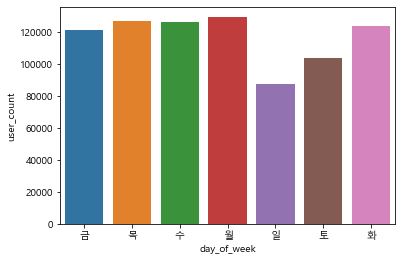

In [ ]:
sns.barplot(data=eawol_bus2021_day, x=eawol_bus2021_day.index, y=eawol_bus2021_day.user_count)

### 3.2 시간대별 승차인원

In [ ]:
eawol_bus2021_time = pd.DataFrame(eawol_bus2021.groupby('base_hour')['user_count'].sum())
eawol_bus2021_time

,user_count
base_hour,
2,1
5,267
6,33381
7,69916
8,67422
9,57966
10,57701
11,56514
12,58330


No handles with labels found to put in legend.


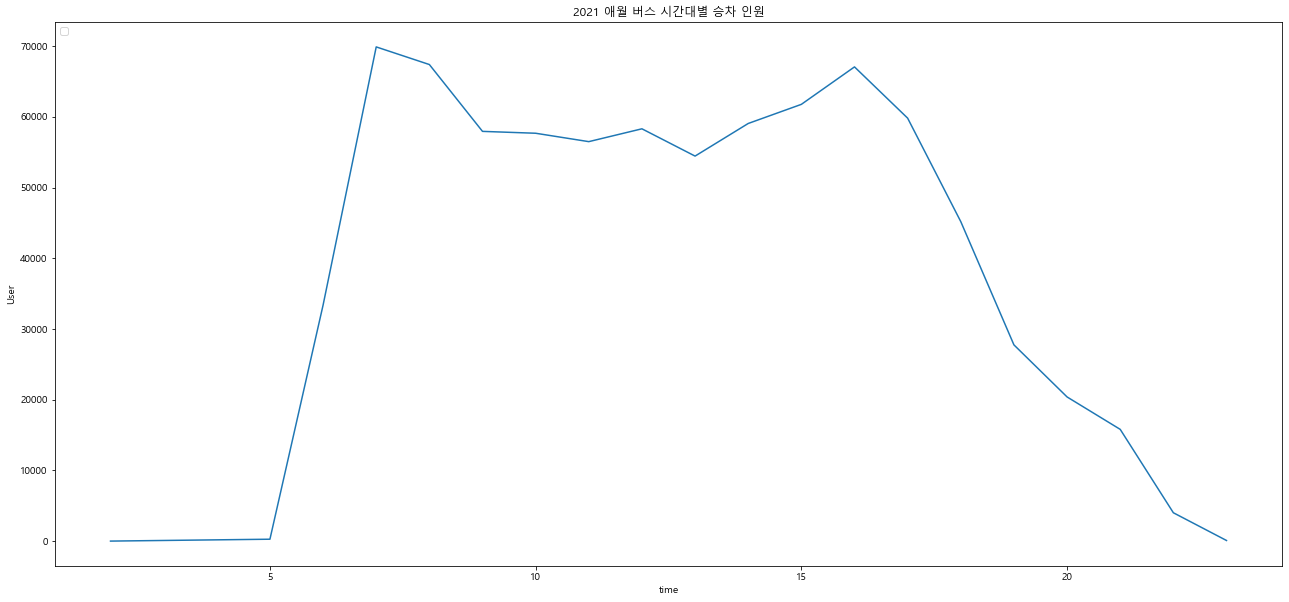

In [ ]:
plt.figure(figsize=(22,10))
plt.plot(eawol_bus2021_time.index, eawol_bus2021_time.user_count)
plt.title("2021 애월 버스 시간대별 승차 인원")
plt.legend(loc=2)
plt.xlabel("time")
plt.ylabel("User")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   base_date            365 non-null    int64  
 1   user_id              365 non-null    float64
 2   bus_user_id          365 non-null    float64
 3   합계                   365 non-null    float64
 4   daily_rainfall       365 non-null    float64
 5   highest_temperature  365 non-null    float64
 6   lowest_temperature   365 non-null    float64
 7   weather              365 non-null    int64  
 8   local_fore           365 non-null    int64  
 9   holiday              365 non-null    int64  
 10  user_count           365 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 34.2 KB


In [ ]:
# Wifi 행 결측 
# wifi 데이터 존재하지 않는 일자 
no_wifi = [20210408,20210528,20210529,20210530,20210531,20210613,20210614,20210615,20210616,20210617,20210618]
data[data['base_date']==]

SyntaxError: invalid syntax (<ipython-input-111-cacd4734e9e0>, line 4)

### 3.3 히트맵

In [ ]:
heatmap_data = data[['base_date', 'user_id', 'bus_user_id','합계', 'daily_rainfall', 'highest_temperature', 'lowest_temperature', 'weather', 'local_fore', 'holiday', 'user_count']]

<AxesSubplot:>

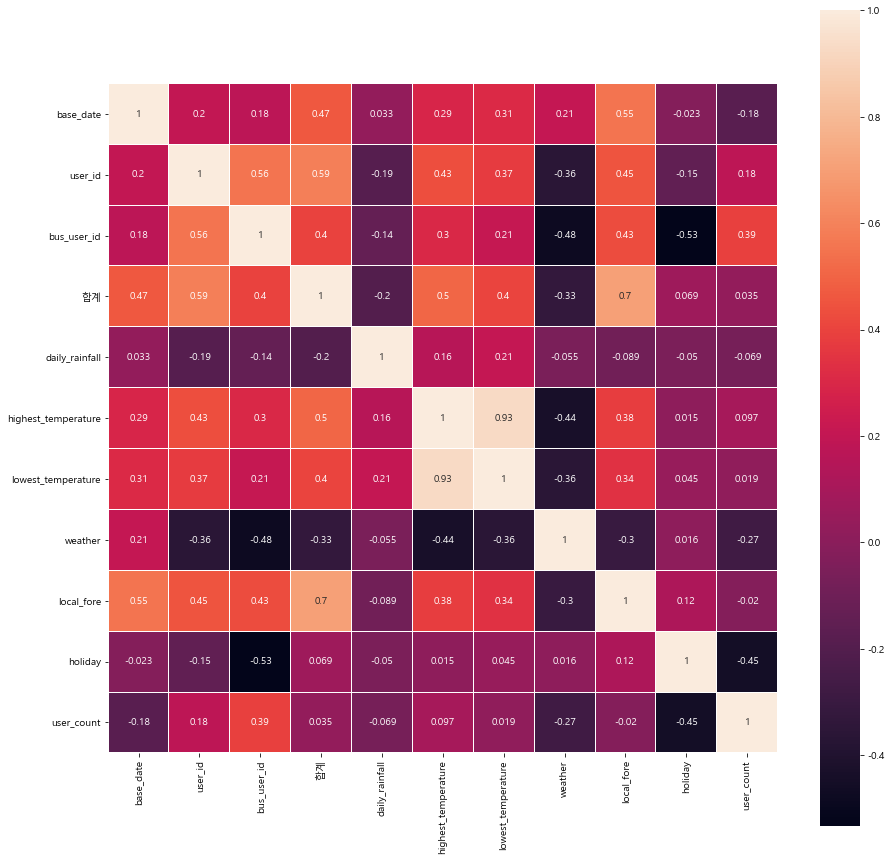

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True, annot_kws = {"size" : 10})

- 절대값 0.1 이상: bus_user_id, holiday, weather, lowest_temperature, use_id

In [ ]:
data.head()

,base_date,user_id,bus_user_id,합계,daily_rainfall,highest_temperature,lowest_temperature,weather,local_fore,holiday,user_count
0,20210101,3192.0,1717.0,109825.5100,0.0,7.7,4.1,4,15356,1,1147.0
1,20210102,3969.0,1898.0,121256.8381,0.0,9.3,3.2,4,9487,1,1477.0
2,20210103,3770.0,2303.0,118924.6849,0.0,5.9,3.0,4,12205,1,1314.0
3,20210104,4036.0,2377.0,117534.3899,0.0,9.2,2.3,4,11894,0,2169.0
4,20210105,3887.0,2720.0,112811.0599,0.0,9.2,3.0,4,11004,0,2021.0


In [ ]:
data['date'] = pd.to_datetime(data['base_date'], format='%y%m%d')
data.index = data['date']
data.set_index('date', inplace=True)

ValueError: unconverted data remains: 101

In [ ]:
data

,base_date,user_id,bus_user_id,합계,daily_rainfall,highest_temperature,lowest_temperature,weather,local_fore,holiday,user_count
date,,,,,,,,,,,
1970-01-01 00:00:00.020210101,20210101,3192.0,1717.0,109825.5100,0.0,7.7,4.1,4,15356,1,1147.0
1970-01-01 00:00:00.020210102,20210102,3969.0,1898.0,121256.8381,0.0,9.3,3.2,4,9487,1,1477.0
1970-01-01 00:00:00.020210103,20210103,3770.0,2303.0,118924.6849,0.0,5.9,3.0,4,12205,1,1314.0
1970-01-01 00:00:00.020210104,20210104,4036.0,2377.0,117534.3899,0.0,9.2,2.3,4,11894,0,2169.0
1970-01-01 00:00:00.020210105,20210105,3887.0,2720.0,112811.0599,0.0,9.2,3.0,4,11004,0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.020211227,20211227,5377.0,3197.0,121856.3338,0.5,7.1,1.0,4,39615,0,2765.0
1970-01-01 00:00:00.020211228,20211228,7174.0,4144.0,130772.7435,0.0,8.8,6.0,4,36229,0,2160.0
1970-01-01 00:00:00.020211229,20211229,7482.0,4115.0,128968.4924,0.0,11.2,6.8,4,38912,0,670.0


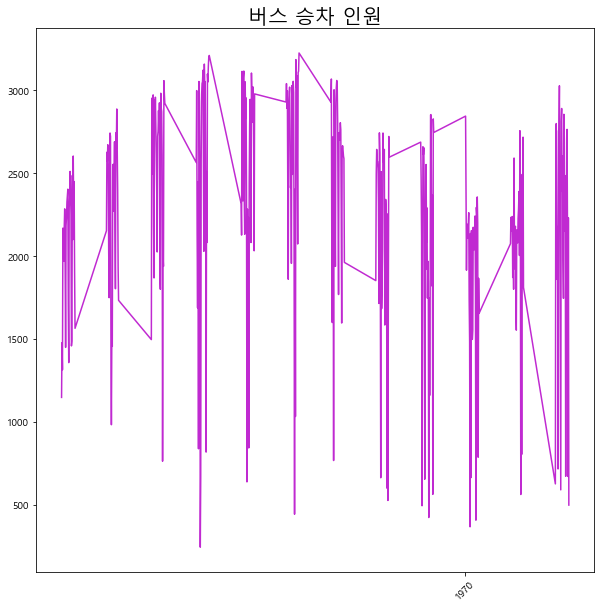

In [ ]:
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(data.index,data['user_count'],color='#c02ad1') ## 선그래프 생성
 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 45도 회전 
plt.title('버스 승차 인원',fontsize=20) ## 타이틀 설정
plt.show()